# notebook to parse the HBN dx csv into a 1 hot encoding of dx presence/absence

In [1]:
import numpy as np
import pandas as pd
import re
import math
from matplotlib import pyplot as plt


In [5]:
dx_file = '../sourcedata/data/HBN/phenotype/consensusDX_data-2021-06-01T18_41_14.276Z.csv'

In [6]:
dx = pd.read_csv(dx_file,skipfooter=6)
dx.columns = ['id','c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11']

/om2/user/jsmentch/anaconda/envs/dyneusr/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
dx[10:15]

,id,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11
10,"NDARAC904DMU,assessment",No Diagnosis Given,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,"NDARAD123TUZ,assessment",ADHD-Combined Type,Autism Spectrum Disorder,Language Disorder,Separation Anxiety,Specific Phobia,Specific Phobia,Unspecified Intellectual Disability,Provisional Tic Disorder,NaN,NaN,NaN
12,"NDARAD232HVV,assessment",Autism Spectrum Disorder,ADHD-Combined Type,Generalized Anxiety Disorder,Social Anxiety (Social Phobia),Obsessive-Compulsive Disorder,Enuresis,Other Specified Schizophrenia Spectrum and Oth...,NaN,NaN,NaN,NaN
13,"NDARAD481FXF,assessment",Major Depressive Disorder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,"NDARAD615WLJ,assessment",ADHD-Combined Type,Autism Spectrum Disorder,Specific Phobia,Specific Phobia,Enuresis,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
sub_list = dx.id.tolist()
sub_list = [elem[:12] for elem in sub_list]

## get a list of all possible dx

In [9]:
all_dx = []
for i,column in enumerate(dx):
    if i==0:
        continue
    all_dx.append(dx[column].tolist())
all_dx = [item for sublist in all_dx for item in sublist]
all_dx = np.unique(np.array(all_dx))
all_dx = all_dx[1:-1]
all_dx = all_dx.tolist()
all_dx[0:10]

['ADHD-Combined Type',
 'ADHD-Hyperactive/Impulsive Type',
 'ADHD-Inattentive Type',
 'Acute Stress Disorder',
 'Adjustment Disorders',
 'Agoraphobia',
 'Alcohol Use Disorder',
 'Autism Spectrum Disorder',
 'Avoidant/Restrictive Food Intake Disorder',
 'Binge-Eating Disorder']

In [10]:
all_dx.index('Unspecified Neurodevelopmental Disorder')

78

In [11]:
#subject by dx array
dx_array = np.zeros( (dx.shape[0],len(all_dx) ))

In [12]:
#LOOP THROUGH columns
for i,column in enumerate(dx):
    if i==0:
        continue
    for ii,d in enumerate(dx[column]):
        #print(i,ii,d)
        if not isinstance(d, str):
            if math.isnan(d):
                continue
        if not bool(re.match(d,' ')):
            dx_array[ii,all_dx.index(d)]=1

In [13]:
dx_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
np.save('../sourcedata/data/HBN/phenotype/parsed/dx_list.npy',all_dx)
np.save('../sourcedata/data/HBN/phenotype/parsed/sub_list.npy',sub_list)
np.save('../sourcedata/data/HBN/phenotype/parsed/dx_onehot.npy',dx_array)

PermissionError: [Errno 13] Permission denied: '../sourcedata/data/HBN/phenotype/parsed/dx_list.npy'

In [15]:
dx_df = pd.DataFrame(dx_array)
dx_df.columns = all_dx
dx_df

,ADHD-Combined Type,ADHD-Hyperactive/Impulsive Type,ADHD-Inattentive Type,Acute Stress Disorder,Adjustment Disorders,Agoraphobia,Alcohol Use Disorder,Autism Spectrum Disorder,Avoidant/Restrictive Food Intake Disorder,Binge-Eating Disorder,...,Tobacco Use Disorder,Tourettes Disorder,Trichotillomania (Hair-Pulling Disorder),Unspecified Anxiety Disorder,Unspecified Attention-Deficit/Hyperactivity Disorder,Unspecified Bipolar and Related Disorder,Unspecified Depressive Disorder,Unspecified Intellectual Disability,Unspecified Neurodevelopmental Disorder,Unspecified Tic Disorder
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1808,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
dx_df.to_pickle('../sourcedata/data/HBN/phenotype/parsed/dx_onehot_df.pkl')
#unpickled_df = pd.read_pickle("./dummy.pkl")

In [139]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(dx_array)


In [140]:
embedding.shape

(1812, 2)

In [141]:
from matplotlib import pyplot as plt

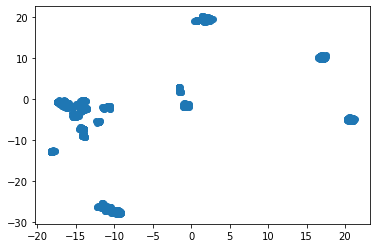

In [143]:
plt.scatter(embedding[:,0],embedding[:,1])

In [ ]:
dx_df = pd.read_pickle('../sourcedata/data/HBN/phenotype/parsed/dx_onehot_df.pkl')

In [21]:
dx_sum = dx_df.sum()

In [23]:
print(dx_sum.to_string())

ADHD-Combined Type                                                              441.0
ADHD-Hyperactive/Impulsive Type                                                  45.0
ADHD-Inattentive Type                                                           316.0
Acute Stress Disorder                                                             3.0
Adjustment Disorders                                                             37.0
Agoraphobia                                                                       9.0
Alcohol Use Disorder                                                              2.0
Autism Spectrum Disorder                                                        261.0
Avoidant/Restrictive Food Intake Disorder                                         1.0
Binge-Eating Disorder                                                             3.0
Bipolar I Disorder                                                                4.0
Bipolar II Disorder                                   

In [46]:
dx_name_list = []
dx_val_list = []
for i,n in enumerate(dx_sum):
    if n>0:
        dx_name_list.append(dx_sum.index[i])
        dx_val_list.append(n)

In [47]:
dx_val_list

[441.0,
 45.0,
 316.0,
 3.0,
 37.0,
 9.0,
 2.0,
 261.0,
 1.0,
 3.0,
 4.0,
 2.0,
 12.0,
 1.0,
 2.0,
 1.0,
 4.0,
 1.0,
 16.0,
 35.0,
 16.0,
 65.0,
 9.0,
 1.0,
 142.0,
 1.0,
 1.0,
 36.0,
 9.0,
 1.0,
 155.0,
 84.0,
 1.0,
 1.0,
 1.0,
 214.0,
 216.0,
 42.0,
 1.0,
 73.0,
 69.0,
 1.0,
 17.0,
 1.0,
 2.0,
 1.0,
 2.0,
 8.0,
 2.0,
 10.0,
 5.0,
 5.0,
 21.0,
 22.0,
 1.0,
 12.0,
 10.0,
 8.0,
 1.0,
 5.0,
 59.0,
 19.0,
 83.0,
 76.0,
 1.0,
 195.0,
 1.0,
 45.0,
 73.0,
 24.0,
 2.0,
 26.0,
 6.0,
 11.0,
 8.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0]

In [48]:
x=np.arange(len(dx_val_list))

Text(0.5,1,'HBN ConsensusDx n > 10')

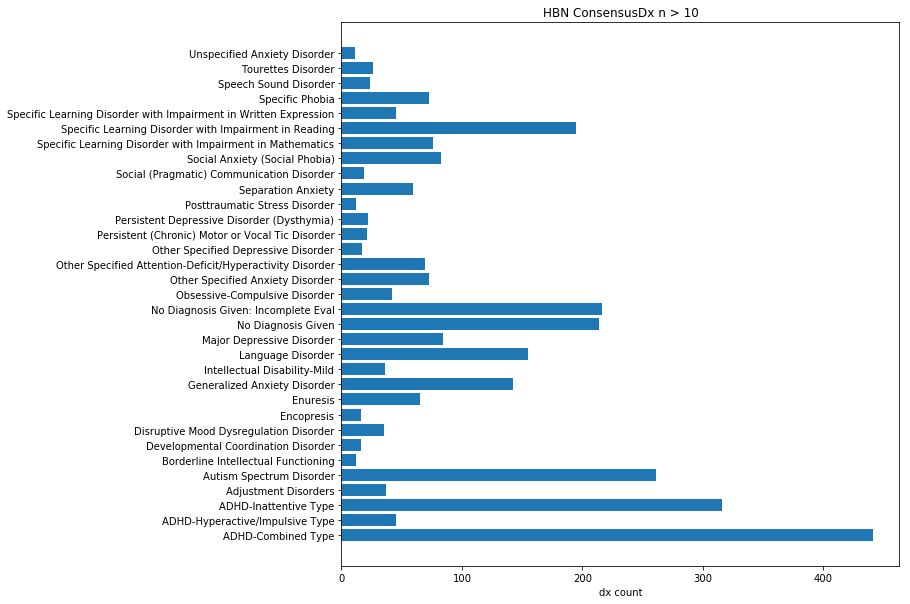

In [45]:
plt.figure(figsize=(10, 10),facecolor='white')
plt.xlabel('dx count')

plt.barh(x,dx_val_list,tick_label=dx_name_list)
plt.title('HBN ConsensusDx n > 10')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 <a list of 80 Text xticklabel objects>)

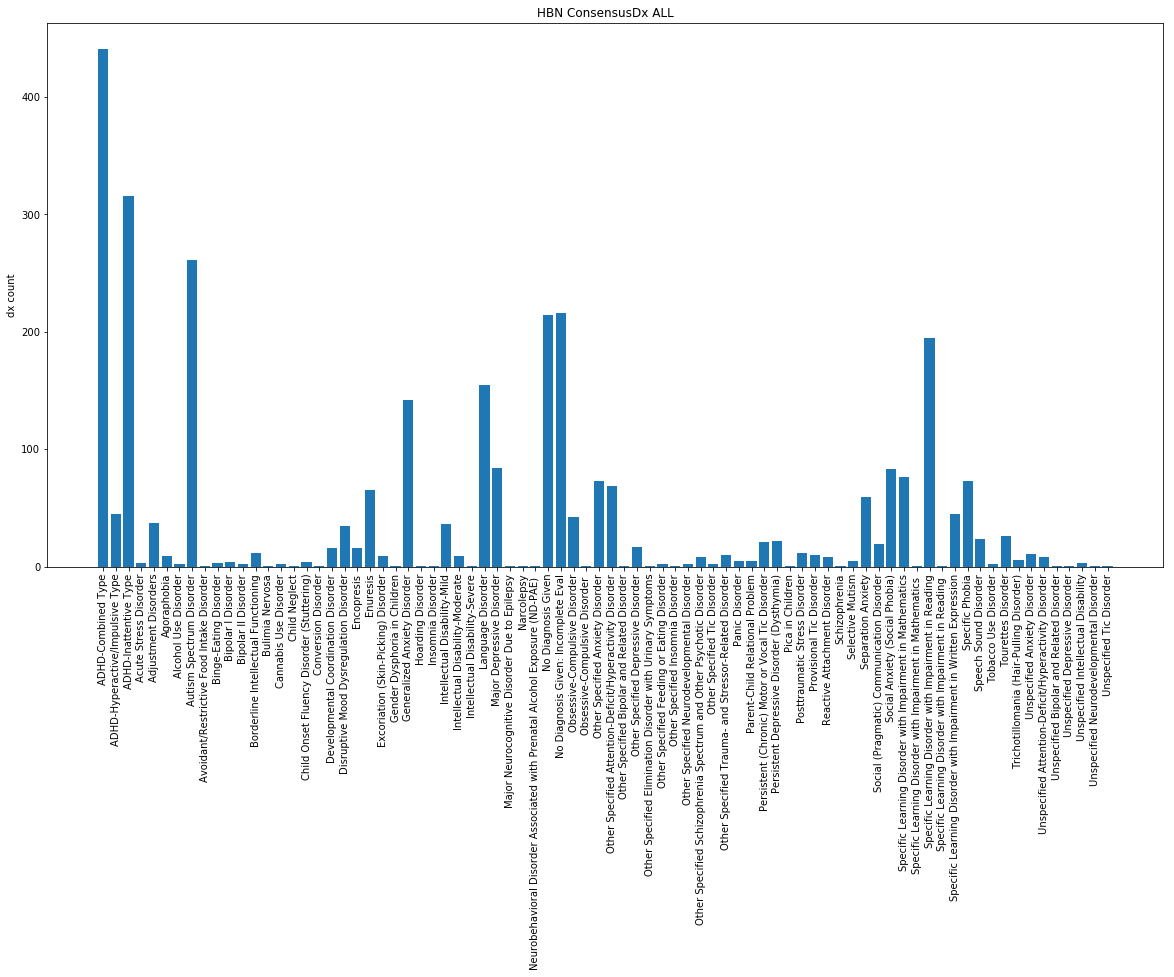

In [52]:
plt.figure(figsize=(20, 10),facecolor='white')
plt.ylabel('dx count')

plt.bar(x,dx_val_list,tick_label=dx_name_list)
plt.title('HBN ConsensusDx ALL')
plt.xticks(rotation=90)